In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
filess = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        f = (os.path.join(dirname, filename))
        filess.append(f)
        print(f)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


In [2]:
### usefull packages
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier 
from sklearn import preprocessing, pipeline

### plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
### global variables 
RS = 143 # random state


In [4]:
test_data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv')

In [5]:
main_data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
print(main_data.head())

   id product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
0   0            A    80.10  material_7  material_8            9            5   
1   1            A    84.89  material_7  material_8            9            5   
2   2            A    82.43  material_7  material_8            9            5   
3   3            A   101.07  material_7  material_8            9            5   
4   4            A   188.06  material_7  material_8            9            5   

   measurement_0  measurement_1  measurement_2  ...  measurement_9  \
0              7              8              4  ...         10.672   
1             14              3              3  ...         12.448   
2             12              1              5  ...         12.715   
3             13              2              6  ...         12.471   
4              9              2              8  ...         10.337   

   measurement_10  measurement_11  measurement_12  measurement_13  \
0          15.859      

In [6]:
totl_len = (main_data.shape)
print(totl_len)


(26570, 26)


In [7]:
### percentage of missing values of each column

nans = pd.DataFrame(main_data.isna().sum())
nas = (nans/totl_len[0])*100

print(nas)


                       0
id              0.000000
product_code    0.000000
loading         0.940911
attribute_0     0.000000
attribute_1     0.000000
attribute_2     0.000000
attribute_3     0.000000
measurement_0   0.000000
measurement_1   0.000000
measurement_2   0.000000
measurement_3   1.433948
measurement_4   2.024840
measurement_5   2.544223
measurement_6   2.995860
measurement_7   3.526534
measurement_8   3.944298
measurement_9   4.617990
measurement_10  4.892736
measurement_11  5.525028
measurement_12  6.025593
measurement_13  6.676703
measurement_14  7.053067
measurement_15  7.561159
measurement_16  7.941287
measurement_17  8.596161
failure         0.000000


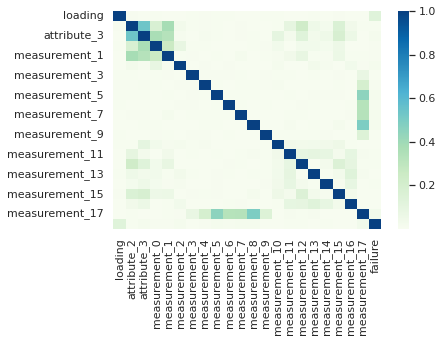

In [8]:

# print(main_data.corr())
sns.heatmap(abs(main_data.iloc[:,1:].corr()),cmap='GnBu')
plt.show()

In [9]:
print(main_data.dtypes)
for kol in main_data.columns:
    li = (main_data[kol].unique())
    li.sort()
    print(li)

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object
[    0     1     2 ... 26567 26568 26569]
['A' 'B' 'C' 'D' 'E']
[ 33.16  39.45  40.81 ... 374.33 385.86    nan]
['material_5' 'material_7']
['material_5' 'material_6' 'material_8']
[5 6 8 9]
[5 6 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29]
[ 0  1  2  3  4  5 

In [10]:

10.264 in main_data.values

True

In [11]:
sub_df = main_data.copy()

label_encod = preprocessing.LabelEncoder()
product_code_en= label_encod.fit(sub_df['product_code'])
sub_df['product_code']  =product_code_en.transform(sub_df['product_code'])


attribute_0_en = label_encod.fit(sub_df['attribute_0'])
# sub_df['attribute_0'] = attribute_0_en.transform(sub_df['attribute_0'])


attribute_1_en = label_encod.fit(sub_df['attribute_1'])
sub_df['attribute_1'] = attribute_0_en.transform(sub_df['attribute_1'])


sub_df['attribute_0'] = (sub_df['attribute_0'].apply(lambda x:x.split('_')[1]))

# for kol in sub_df.columns:
#     sub_df = sub_df[(sub_df[kol] != 'ffill')]

print(sub_df.head())


   id  product_code  loading attribute_0  attribute_1  attribute_2  \
0   0             0    80.10           7            2            9   
1   1             0    84.89           7            2            9   
2   2             0    82.43           7            2            9   
3   3             0   101.07           7            2            9   
4   4             0   188.06           7            2            9   

   attribute_3  measurement_0  measurement_1  measurement_2  ...  \
0            5              7              8              4  ...   
1            5             14              3              3  ...   
2            5             12              1              5  ...   
3            5             13              2              6  ...   
4            5              9              2              8  ...   

   measurement_9  measurement_10  measurement_11  measurement_12  \
0         10.672          15.859          17.594          15.193   
1         12.448          17.947  

In [12]:
sub_df.drop(['id',"product_code", "attribute_1"], axis=1, inplace=True)
sub_df = sub_df.dropna().reset_index(drop=True)#.ffill().bfill()
inputs = sub_df.iloc[:,:-1].values
outputs = sub_df.iloc[:,-1].values


train_inputs, test_inputs, train_outputs,test_outputs = train_test_split(inputs,outputs,test_size=0.5)


In [13]:
len(train_inputs)
train_outputs
# list(range(2,25))

array([1, 0, 0, ..., 0, 1, 0])

In [14]:
### modeling


dt_classi = DecisionTreeClassifier(max_depth=5, random_state=RS)
        
dt_params = {'max_depth':list(range(2,25)),
            'criterion':["gini", "entropy"],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2']
            }
dt_model = GridSearchCV(dt_classi,dt_params, cv=3,scoring='roc_auc')

dt_model.fit(train_inputs,train_outputs)

### train data , accuracy checks and developments
train_outputs_pred = dt_model.predict(train_inputs)
print(f'*************************\ntrain outputs data of size :{len(train_outputs_pred)}\n*************************')
print(f'accuracy metric: {accuracy_score(train_outputs, train_outputs_pred)} \n')
print(f'classification report: \n{classification_report(train_outputs, train_outputs_pred)} \n')
print(f'confusion matrix: \n{confusion_matrix(train_outputs, train_outputs_pred)}\n')



### trains test data, accuracy checks
test_outputs_pred = dt_model.predict(test_inputs)

print(f'*************************\ntrains tests outputs data of size :{len(test_outputs_pred)}\n*************************')
print(f'accuracy metric: {accuracy_score(test_outputs, test_outputs_pred)} \n')
print(f'classification report: \n{classification_report(test_outputs, test_outputs_pred)} \n')
print(f'confusion matrix: \n{confusion_matrix(test_outputs, test_outputs_pred)}')



*************************
train outputs data of size :6091
*************************
accuracy metric: 0.7864061730421934 

classification report: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4790
           1       0.00      0.00      0.00      1301

    accuracy                           0.79      6091
   macro avg       0.39      0.50      0.44      6091
weighted avg       0.62      0.79      0.69      6091
 

confusion matrix: 
[[4790    0]
 [1301    0]]

*************************
trains tests outputs data of size :6092
*************************
accuracy metric: 0.7939921208141826 

classification report: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      4837
           1       0.00      0.00      0.00      1255

    accuracy                           0.79      6092
   macro avg       0.40      0.50      0.44      6092
weighted avg       0.63      0.79      0.70      60

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [15]:
dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [16]:
for kol in test_data.columns:
    li = (test_data[kol].unique())
    li.sort()
    print(li)

[26570 26571 26572 ... 47342 47343 47344]
['F' 'G' 'H' 'I']
[ 37.7   42.77  42.86 ... 362.7  385.57    nan]
['material_5' 'material_7']
['material_5' 'material_6' 'material_7']
[6 7 9]
[4 5 7 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28]
[13.565 13.637 14.132 ... 21.306 21.389    nan]
[ 7.384  8.009  8.037 ... 15.268 15.623    nan]
[12.215 13.439 13.474 ... 21.11  21.681    nan]
[13.539 13.551 13.626 ... 21.131 21.183    nan]
[ 7.853  8.041  8.085 ... 15.47  15.828    nan]
[14.885 14.971 15.206 ... 22.828 23.092    nan]
[ 7.578  7.669  7.7   ... 15.086 15.091    nan]
[ 9.167  9.386  9.403 ... 22.259 23.354    nan]
[13.127 13.146 13.151 ... 24.648 24.95     nan]
[ 6.116  6.154  6.273 ... 17.686 18.962    nan]
[ 9.209  9.892  9.903 ... 21.071 21.677    

In [17]:
('I' in test_data.values)

True

In [18]:
sub_test_data  = test_data.copy()
sub_test_data.drop(['id',"product_code","attribute_1"], axis=1, inplace=True)
sub_test_data['attribute_0'] = (sub_test_data['attribute_0'].apply(lambda x:x.split('_')[1]))
indx =  test_data.iloc[:,0]
sub_test_data = sub_test_data.ffill()

# sub_test_data['attribute_0'] = attribute_0_en.transform(sub_test_data['attribute_0'])
# sub_test_data['product_code'] = product_code_en.transform(sub_test_data['product_code'])

final = dt_model.predict(sub_test_data.values)

In [19]:
print(sub_test_data.shape)#['attribute_0'].unique())

(20775, 22)


In [20]:
final = pd.DataFrame({'failure':final,'id':indx})
final.set_index('id', inplace = True)

In [21]:
final.head()

,failure
id,
26570,0
26571,0
26572,0
26573,0
26574,0


In [22]:
final_output = final.to_csv('/kaggle/working/submission.csv')